In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import pyeeg
%matplotlib notebook

# load files 

In [2]:
# import each and every file

dirB="/home/putus/PROJECT/EEG/setB/"
tempB = []
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)

dirC="/home/putus/PROJECT/EEG/setC/"
tempC = []
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)
    
dirE="/home/putus/PROJECT/EEG/setE/"
tempE = []
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

# create small tables 

In [3]:
tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)
    
tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

# make big table

In [4]:
def table(table):
    big_table = None
    for ta in table:
        big_table = pd.concat([big_table, ta],axis=1)
    return big_table

In [5]:
bigB = table(tb)
bigC = table(tc)
bigE = table(te)
head = list(bigB.columns.values)

In [6]:
bigE.head(4)

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,100,340,-310,84,343,-88,176,661,-377,374,...,-129,-26,308,-155,-113,-40,187,-438,-476,23
1,124,353,93,75,311,-115,186,721,-379,-205,...,-309,1,367,-283,-185,-58,44,-561,-518,144
2,153,400,494,21,284,-140,189,702,-396,-871,...,-432,29,413,-456,-269,-75,-147,-622,-521,228
3,185,470,789,-68,274,-159,198,628,-448,-1325,...,-412,41,429,-541,-328,-88,-368,-581,-362,260


# create all functions call

In [7]:
# source : https://stackoverflow.com/questions/8245687/numpy-root-mean-squared-rms-smoothing-of-a-signal
def window_rms(a, window_size):
            a2 = np.power(a,2)
            window = np.ones(window_size)/float(window_size)
            return np.sqrt(np.convolve(a2, window, 'valid'))

In [8]:
def RMS(mat,head,window_size):
    [a]=np.shape(window_rms(mat[:,0],window_size))
    rms = np.zeros((a,len(head)))
    for i in range(len(head)):
        rms[:,i] = window_rms(mat[:,i],window_size)
    return rms

In [9]:
def std_val(rms,head):
    std_data=[]
    for i in range(len(head)):
        std_data.append(np.std(rms[:,i]))
    return std_data
    
def mean_val(rms,head):
    mean_data=[]
    for i in range(len(head)):
        mean_data.append(np.mean(rms[:,i]))
    return mean_data

In [10]:
def barplot(std_data,title): 
    N = len(std_data)
    x = range(N)
    width = 1/1.5
    fig=plt.figure()
    plt.bar(x,std_data,width)
    fig = plt.gcf()
    plt.title('')
    plt.show(title)

In [11]:
def mat_plt(mat,head):
    fig = plt.figure()
    for i in range(len(head)):
        plt.subplot(25,4,i+1)
        plt.plot(mat[:,i])
        fig.subplots_adjust(hspace=0)
        fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)
        fig.set_figwidth(30)
        fig.set_figheight(30)
        #plt.axis('off')
        sleep(0.01)
    plt.show()

# creat sub matrix for each

In [12]:
# creat a matrix
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx
# every mat contain probs mat[:,i] total 28 start form mat1

In [43]:
matB = creat_mat(bigB) # : refers to healthy data
matC = creat_mat(bigC) # : refers to Inter-ictal (transition between healthy to seizure)
matE = creat_mat(bigE) # : of ictal or seizures

matB=np.nan_to_num(matB)
matC=np.nan_to_num(matC)
matE=np.nan_to_num(matE)


# 4097 data point per channel 
# 173.61 Hz sample rate and there are 4097 data point for each channel
# total 100 channel are their
# 4097/173.61 = 23.59 sec 
# the raw data from one of the channels for the 23.59 sec

#  <---------  create number of featuters ------------>

# feature-1 f1

In [14]:
# the absolute size of the peak in a 15 second window

#The general approach is to smooth vector by convolving it with wavelet(width) for each width in widths. 
#Relative maxima which appear at enough length scales, and with sufficiently high SNR, are accepted.

from scipy import signal

# source: https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.find_peaks_cwt.html

def f1(mat,w):
    p = signal.find_peaks_cwt(mat,np.arange(1,w))
    return len(p)

In [15]:
pB=[]
pC=[]
pE=[]
for i in range(50):
    pB.append(f1(matB[:,i],10))
    pC.append(f1(matC[:,i],10))
    pE.append(f1(matE[:,i],10))

# feature-2 f2 

In [17]:
plt.plot(np.linspace(0,23,4097),matB[:,1])
plt.xlabel('time (s)')
plt.ylabel('MEG data (T)')
plt.show()

In [18]:
len(matB[:,1])

4097

In [19]:
np.shape(matB)

(4097, 100)

In [20]:
DFA = pyeeg.dfa(matB[:,1])
Hurst_Exponent = pyeeg.hurst(matB[:,1])
PFD = pyeeg.pfd(matB[:,1])

/home/putus/anaconda3/lib/python3.5/site-packages/pyeeg-0.4.0-py3.5.egg/pyeeg/__init__.py:90: RuntimeWarning: invalid value encountered in true_divide


In [49]:
DFA_B = []
Hurst_Exponent_B = []
PFD_B = []

DFA_C = []
Hurst_Exponent_C = []
PFD_C = []

DFA_E = []
Hurst_Exponent_E = []
PFD_E = []

for i in range(50):
    DFA_B.append(pyeeg.dfa(matB[:,i]))
    #Hurst_Exponent_B.append( pyeeg.hurst(matB[:,i]))
    PFD_B.append(pyeeg.pfd(matB[:,1]))
    
    DFA_C.append(pyeeg.dfa(matC[:,i]))
    #Hurst_Exponent_C.append( pyeeg.hurst(matC[:,i]))
    PFD_C.append(pyeeg.pfd(matC[:,1]))
    
    DFA_E .append(pyeeg.dfa(matE[:,i]))
    #Hurst_Exponent_E.append( pyeeg.hurst(matE[:,i]))
    PFD_E.append(pyeeg.pfd(matE[:,1]))


<IPython.core.display.Javascript object>


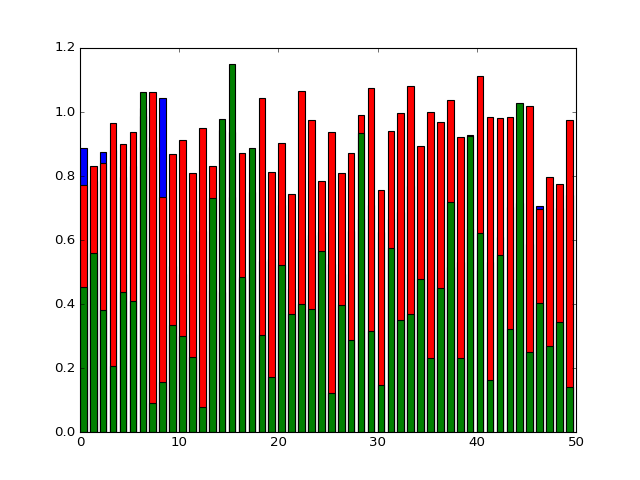

In [53]:
N = len(DFA_B)
x = range(N)
width = 1/1.5
fig=plt.figure()
plt.bar(x,DFA_B,width,color='blue')
plt.bar(x,DFA_C,width,color='red')
plt.bar(x,DFA_E,width,color='green')
fig = plt.gcf()
plt.show()

In [41]:
x=np.nan_to_num(matB)

In [73]:
x= [DFA_B[7],DFA_C[7],DFA_E[7]]

<IPython.core.display.Javascript object>


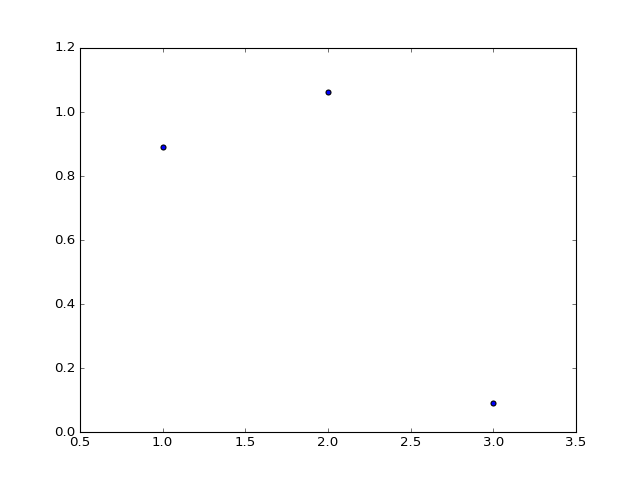

In [74]:
plt.scatter(np.arange(1,4,1),x)

In [68]:
np.arange(1,4,1)

array([1, 2, 3])